# Calculate bowleys's coefficient

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [395]:

class SimpleRandom:
    def __init__(self, seed=None):
        if seed is None:
            seed = int(time.time() * 1000000) % 1000000
        self.state = seed

    def rand(self):
        a = 1664525
        c = 1013904223
        m = 2**32
        self.state = (a * self.state + c) % m
        return self.state
    def randrange(self, start, stop):

        range_size = stop - start
        rand_num = self.rand() % range_size
        return start + rand_num

    


In [397]:
my_random = SimpleRandom()  

In [398]:
class BiasedDie:
    def __init__(self, k):
        if k < 2:
            raise ValueError("The die must have at least 2 faces.")
        self.k = k
        self.probabilities = [1 / (2 ** (i - 1)) for i in range(2, k + 1)]
        self.probabilities.insert(0, 1 / (2 ** (k - 1)))  # P(1) = P(k)

    def roll(self):
        random_value = my_random.rand() / (2**32)

        cumulative_prob = 0

        for i, prob in enumerate(self.probabilities):
            cumulative_prob += prob
            if random_value <= cumulative_prob:
                return i + 1  # Adjust for 1-based indexing

##### cumulative_prob = 0: Initializes a variable to keep track of the cumulative probability as we iterate through the probabilities of each face.
##### The code checks if random_value is less than or equal to cumulative_prob. If this condition is met, it means that the random value falls within the range of the current face's probability. Here we make a assumption that probability of this point is given the random generator. if it's less than CDF of that number it fits the range

##### When the condition is met, the method returns i + 1. The i + 1 adjustment is made because the list of probabilities is 0-based (i.e., the first face is at index 0), but traditional dice notation uses 1-based indexing (i.e., the first face is labeled as 1, not 0).

In [399]:
# Example usage with a biased 4-faced die (k=4)
k = 4
biased_die = BiasedDie(k)


In [400]:
dictionary_of_freq_of_sum = {}
sums = []

In [401]:
print(dictionary_of_freq_of_sum)
print(sums)

{}
[]


In [402]:
for epoch in range(1000):
    sum_of_four_rolls = 0
    for _ in range(4):
        result = biased_die.roll()
        sum_of_four_rolls += result
    # print(result)
    sums.append(sum_of_four_rolls)
    if sum_of_four_rolls not in dictionary_of_freq_of_sum:
        dictionary_of_freq_of_sum[sum_of_four_rolls] = 1
    else:
        dictionary_of_freq_of_sum[sum_of_four_rolls] += 1

        

In [403]:
    
print(dictionary_of_freq_of_sum)

{8: 170, 10: 208, 9: 226, 11: 138, 6: 29, 7: 96, 13: 34, 12: 86, 14: 8, 5: 4, 15: 1}


In [ ]:
sorted_sums = sorted(sums)
n = len(sorted_sums)


In [ ]:
n = len(sorted_sums)
Q1 = np.percentile(sorted_sums, 25)
if n % 2 == 0:
    # Calculate the median for even n
    median = (sorted_sums[n // 2 - 1] + sorted_sums[n // 2]) / 2
else:
    # Calculate the median for odd n
    median = sorted_sums[n // 2]
Q3 = np.percentile(sorted_sums, 75)

In [ ]:
bowleys_coefficient = (Q3 + Q1 - 2 * median) / (Q3 - Q1)


In [404]:
bowleys_coefficient = round(bowleys_coefficient, 10)
print(f"Bowley's Coefficient: {bowleys_coefficient}")

Bowley's Coefficient: 0.3333333333


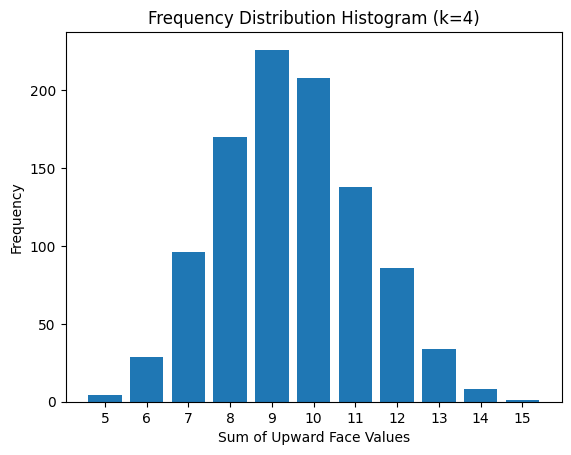

In [405]:
plt.bar(dictionary_of_freq_of_sum.keys(), dictionary_of_freq_of_sum.values())
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution Histogram (k={k})')

# Adjust x-axis ticks to display a reasonable range of values
plt.xticks(range(min(dictionary_of_freq_of_sum.keys()), max(dictionary_of_freq_of_sum.keys()) + 1))

plt.show()


In [406]:
dictionary_of_freq_of_sum = {}
sums = []

In [407]:
print(dictionary_of_freq_of_sum)
print(sums)

{}
[]


In [408]:
for epoch in range(1000):
    sum_of_four_rolls = 0
    for _ in range(8):
        result = biased_die.roll()
        sum_of_four_rolls += result
    sums.append(sum_of_four_rolls)
    # print(result)
    if sum_of_four_rolls not in dictionary_of_freq_of_sum:
        dictionary_of_freq_of_sum[sum_of_four_rolls] = 1
    else:
        dictionary_of_freq_of_sum[sum_of_four_rolls] += 1

        

In [409]:
    
print(dictionary_of_freq_of_sum)

{23: 42, 16: 108, 18: 133, 20: 132, 15: 39, 19: 169, 17: 134, 22: 57, 21: 130, 13: 9, 26: 5, 14: 19, 24: 15, 28: 1, 25: 6, 12: 1}


In [ ]:
sorted_sums = sorted(sums)


In [ ]:
n = len(sorted_sums)

In [ ]:
Q1 = np.percentile(sorted_sums, 25)

In [ ]:
n = len(sorted_sums)
Q1 = np.percentile(sorted_sums, 25)
if n % 2 == 0:
    # Calculate the median for even n
    median = (sorted_sums[n // 2 - 1] + sorted_sums[n // 2]) / 2
else:
    # Calculate the median for odd n
    median = sorted_sums[n // 2]
Q3 = np.percentile(sorted_sums, 75)

In [ ]:

bowleys_coefficient = (Q3 + Q1 - 2 * median) / (Q3 - Q1)

In [410]:
# Round the bowleys_coefficient to 4 decimal places
bowleys_coefficient = round(bowleys_coefficient, 10)

print(f"Bowley's Coefficient: {bowleys_coefficient}")


Bowley's Coefficient: 0.0


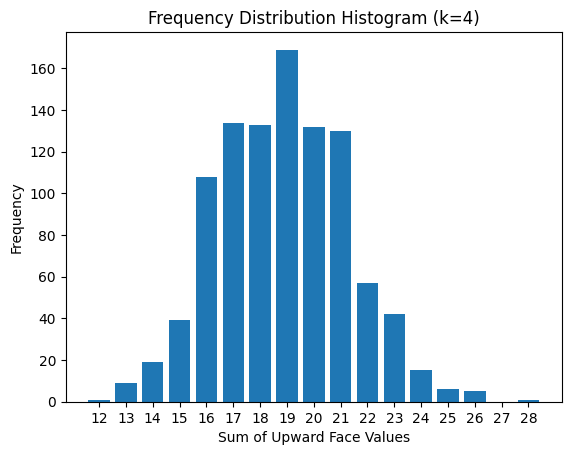

In [411]:
plt.bar(dictionary_of_freq_of_sum.keys(), dictionary_of_freq_of_sum.values())
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution Histogram (k={k})')

# Adjust x-axis ticks to display a reasonable range of values
plt.xticks(range(min(dictionary_of_freq_of_sum.keys()), max(dictionary_of_freq_of_sum.keys()) + 1))

plt.show()


In [412]:
dictionary_of_freq_of_sum = {}
sums = []

In [413]:
print(dictionary_of_freq_of_sum)
print(sums)

{}
[]


In [414]:
for epoch in range(1000):
    sum_of_four_rolls = 0
    for _ in range(16):
        result = biased_die.roll()
        sum_of_four_rolls += result
    sums.append(sum_of_four_rolls)
    # print(result)
    if sum_of_four_rolls not in dictionary_of_freq_of_sum:
        dictionary_of_freq_of_sum[sum_of_four_rolls] = 1
    else:
        dictionary_of_freq_of_sum[sum_of_four_rolls] += 1

        

In [415]:
    
print(dictionary_of_freq_of_sum)

{35: 81, 34: 51, 37: 130, 38: 116, 41: 79, 33: 47, 36: 96, 40: 103, 39: 114, 44: 21, 32: 27, 43: 34, 31: 12, 42: 46, 48: 2, 30: 6, 46: 9, 45: 17, 50: 1, 29: 5, 47: 3}


In [ ]:
sorted_sums = sorted(sums)
n = len(sorted_sums)

In [ ]:

n = len(sorted_sums)
Q1 = np.percentile(sorted_sums, 25)
if n % 2 == 0:
    # Calculate the median for even n
    median = (sorted_sums[n // 2 - 1] + sorted_sums[n // 2]) / 2
else:
    # Calculate the median for odd n
    median = sorted_sums[n // 2]
Q3 = np.percentile(sorted_sums, 75)
bowleys_coefficient = (Q3 + Q1 - 2 * median) / (Q3 - Q1)


In [416]:
# Round the bowleys_coefficient to 4 decimal places
bowleys_coefficient = round(bowleys_coefficient, 10)

print(f"Bowley's Coefficient: {bowleys_coefficient}")




Bowley's Coefficient: 0.0


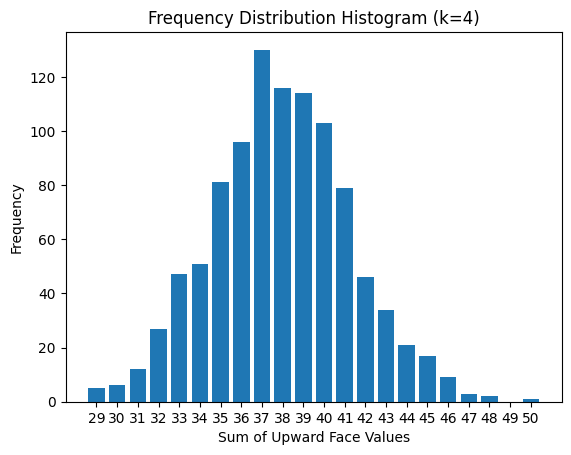

In [417]:
plt.bar(dictionary_of_freq_of_sum.keys(), dictionary_of_freq_of_sum.values())
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Frequency Distribution Histogram (k={k})')

# Adjust x-axis ticks to display a reasonable range of values
plt.xticks(range(min(dictionary_of_freq_of_sum.keys()), max(dictionary_of_freq_of_sum.keys()) + 1))

plt.show()


Bowley's coefficient for the three scenarios (4 rolls, 8 rolls, and 16 rolls) with 1000 trials each, considering the Central Limit Theorem (CLT):

1st case 4 Rolls Summed 1000 Times:

With only 4 rolls, the sample size is relatively small. The CLT might not have a significant impact on the distribution of the sum of the face values. The distribution is influenced by the probabilities assigned to each face of the die (biased distribution). However, due to the small sample size, the CLT may not lead to a distribution that closely resembles a normal distribution.

Bowley's Coefficient: In this case, the distribution is expected to exhibit some level of skewness based on the biased probabilities.  The distribution is somewhat skewed, but is not exhibiting a pronounced tail. ~ 0.333

2nd case 8 Rolls Summed 1000 Times:

Central Limit Theorem (CLT): With 8 rolls, the sample size is larger than in the previous scenario. The CLT starts to become more relevant. As you sum the face values from 8 rolls, the distribution of the sum is expected to become more symmetric and approach a normal distribution. The CLT suggests that the distribution will be less skewed compared to the 4-roll scenario.

Bowley's Coefficient: With the larger sample size and a more symmetric distribution due to the CLT, Bowley's coefficient is expected to be closer to 0. The distribution still exhibit some skewness, but it would likely be less pronounced compared to the 4-roll scenario. ~0

3rd case 16 Rolls Summed 1000 Times:

Central Limit Theorem (CLT): The sample size is the largest in this scenario. With 16 rolls, the CLT has a more substantial impact. The distribution of the sum is expected to be much closer to a normal distribution. The CLT suggests that the distribution will be even less skewed compared to the 8-roll scenario.

Bowley's Coefficient: With the largest sample size and a distribution that closely approximates normality due to the CLT, Bowley's coefficient is expected to be very close to 0. The distribution is likely to be nearly symmetric, and any remaining skewness would be minimal. ~0

In summary, as the number of rolls increases, the influence of the Central Limit Theorem becomes more pronounced. With a larger sample size, the distribution of the sum of the face values approaches normality and becomes less skewed. Consequently, Bowley's coefficient is expected to decrease, approaching 0, indicating a more symmetric distribution as you move from 4 rolls to 8 rolls and then to 16 rolls.
~0




